In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import modules

In [25]:
tf = pd.read_csv('training_set_features.csv')
tl = pd.read_csv('training_set_labels.csv')
#read data

# EDA and Preprocessing

In [26]:
tf.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [27]:
tl.head()
#preview atas data

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,0,0,0
1,1,0,1
2,2,0,0
3,3,0,1
4,4,0,0


In [28]:
tf.info()
#info data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

In [29]:
tf.isnull().sum()
#banyak data kosong tiap kolom

respondent_id                      0
h1n1_concern                      92
h1n1_knowledge                   116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
opinion_h1n1_sick_from_vacc      395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
m

<Axes: >

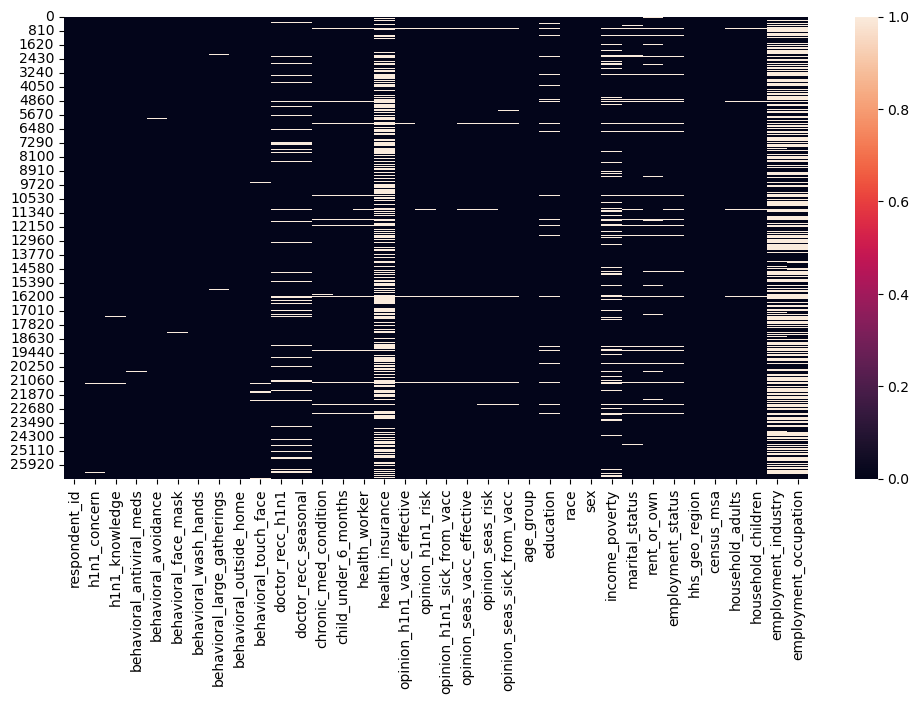

In [30]:
plt.figure(figsize=(12,6))
sns.heatmap(tf.isnull())
#banyak data kosong berwarna terang

In [31]:
tf.drop(['health_insurance','employment_industry','employment_occupation','respondent_id'],axis=1,inplace=True)
#hilangkan data yang terlalu banyak yang kosong

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_23740\2427804989.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(tf.corr(),cmap='viridis')


<Axes: >

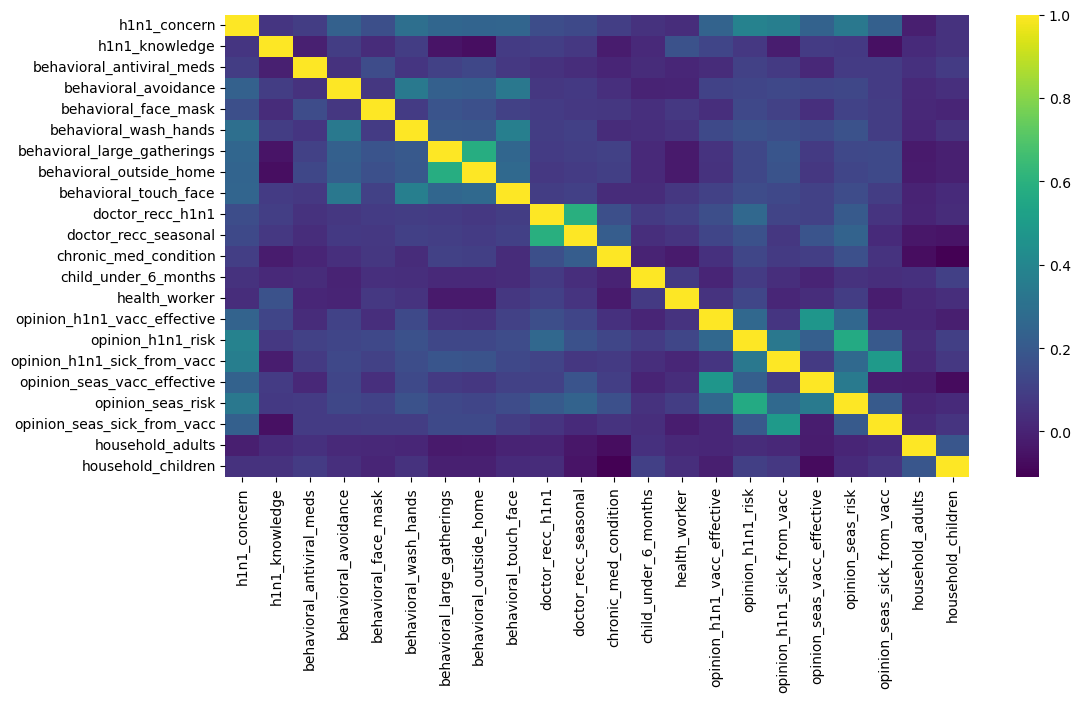

In [32]:
plt.figure(figsize=(12,6))
sns.heatmap(tf.corr(),cmap='viridis')

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_23740\2568971520.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  tf.corr()['h1n1_concern'].sort_values()[:-1].plot(kind='bar')


<Axes: >

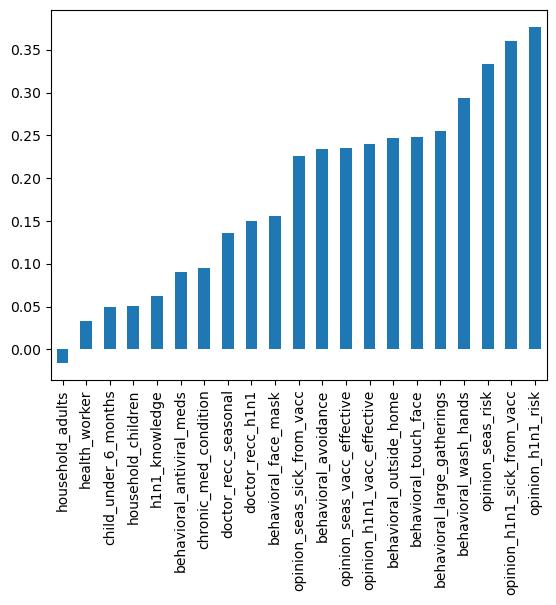

In [33]:
tf.corr()['h1n1_concern'].sort_values()[:-1].plot(kind='bar')

In [34]:
grup = []
mind = []
for key in tf.corr().columns:
        most = (tf.corr()[key].sort_values()[-2])
        ind = tf.corr()[tf.corr()[key] == most][key].index[0]
        mind.append(tf.corr()[tf.corr()[key] == most][key].index[0])
        grup.append(tf.groupby(ind)[key].mean())
penh = pd.DataFrame([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21]).transpose()
penh.columns = tf.corr().columns
def miss(key,est):
    if pd.isna(key):
        has = grup[penh[key][0]][est]
        return has
    else:
        return key 

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_23740\1878503979.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  for key in tf.corr().columns:
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_23740\1878503979.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  most = (tf.corr()[key].sort_values()[-2])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_23740\1878503979.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ind = tf.corr()[tf.corr()[key] == most][key].index[0]
C:\Users\LENO

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_23740\1878503979.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ind = tf.corr()[tf.corr()[key] == most][key].index[0]
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_23740\1878503979.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mind.append(tf.corr()[tf.corr()[key] == most][key].index[0])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_23740\1878503979.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  most = (tf.corr()[key].s

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_23740\1878503979.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mind.append(tf.corr()[tf.corr()[key] == most][key].index[0])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_23740\1878503979.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  most = (tf.corr()[key].sort_values()[-2])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_23740\1878503979.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ind = tf.corr()[tf.corr()[key] == mo

In [23]:
for x in tf.corr().columns:
    z = mind[penh[x][0]]
    masuk = tf[[x , z]]
    index = 0
    tf[x] = masuk.apply(lambda y: miss(y[x],y[z]),axis=1)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_23740\1485379251.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  for x in tf.corr().columns:


KeyError: nan

In [35]:
for x in tf:
    tf[x].fillna(tf[x].mode()[0], inplace=True)
#mengganti data kosong kategori dengan modus terbanyak tiap kolom

In [36]:
'''from sklearn.linear_model import LogisticRegression,LinearRegression
for x in tf:
    if tf[x].isnull().sum() > 0:
        lr = LogisticRegression()
        lr.fit(g.drop(tf[tf[x].isnull()].index).values,tf[x].dropna().values)
        predin = lr.predict(g[tf[x].isnull()].values)
        dex = 0
        for i in tf[tf[x].isnull()].index:
            tf[x][i] = predin[dex]
            dex+=1'''
#ga jadi

'from sklearn.linear_model import LogisticRegression,LinearRegression\nfor x in tf:\n    if tf[x].isnull().sum() > 0:\n        lr = LogisticRegression()\n        lr.fit(g.drop(tf[tf[x].isnull()].index).values,tf[x].dropna().values)\n        predin = lr.predict(g[tf[x].isnull()].values)\n        dex = 0\n        for i in tf[tf[x].isnull()].index:\n            tf[x][i] = predin[dex]\n            dex+=1'

In [37]:
tf.isnull().sum()
#periksa lagi apa ada data kosong

h1n1_concern                   0
h1n1_knowledge                 0
behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_h1n1               0
doctor_recc_seasonal           0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
opinion_h1n1_vacc_effective    0
opinion_h1n1_risk              0
opinion_h1n1_sick_from_vacc    0
opinion_seas_vacc_effective    0
opinion_seas_risk              0
opinion_seas_sick_from_vacc    0
age_group                      0
education                      0
race                           0
sex                            0
income_poverty                 0
marital_status                 0
rent_or_own                    0
employment_status              0
hhs_geo_region                 0
census_msa                     0
household_

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_23740\2377890292.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  pd.concat([tf,tl.drop('respondent_id',axis=1)],axis=1).corr()['h1n1_vaccine'].sort_values()[:-1].plot(kind='bar')


<Axes: >

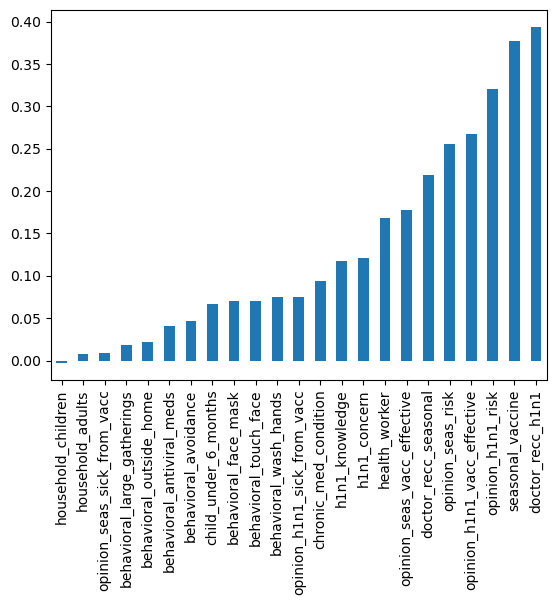

In [38]:
pd.concat([tf,tl.drop('respondent_id',axis=1)],axis=1).corr()['h1n1_vaccine'].sort_values()[:-1].plot(kind='bar')
#lihat relevansi label h1n1_vaccine dengan fitur data

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_23740\3864028289.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  pd.concat([tf,tl.drop('respondent_id',axis=1)],axis=1).corr()['seasonal_vaccine'].sort_values()[:-1].plot(kind='bar')


<Axes: >

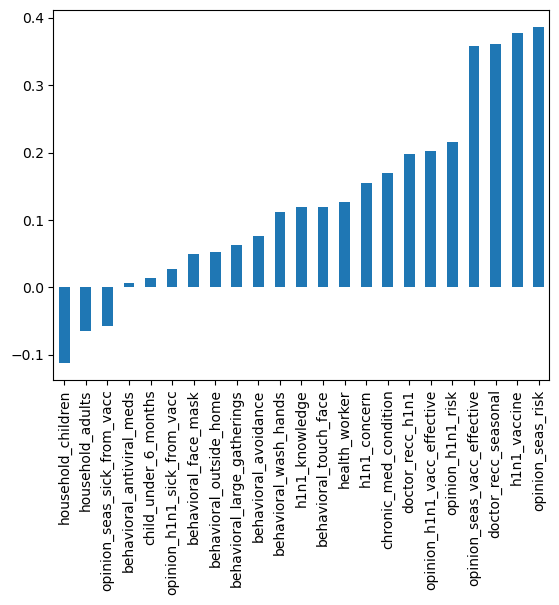

In [39]:
pd.concat([tf,tl.drop('respondent_id',axis=1)],axis=1).corr()['seasonal_vaccine'].sort_values()[:-1].plot(kind='bar')
#lihat relevansi label seasonal_vaccine dengan fitur data

In [40]:
tf.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0


In [41]:
hf = tf[['h1n1_concern', 'h1n1_knowledge','opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc']]
#membuat data baru untuk melakukan one hot encoding

one hot encoding

In [42]:
conc = pd.get_dummies(hf['h1n1_concern'],drop_first=True)

In [43]:
know = pd.get_dummies(hf['h1n1_knowledge'],drop_first=True)

In [44]:
opn_hfe = pd.get_dummies(hf['opinion_h1n1_vacc_effective'],drop_first=True)

In [45]:
opn_hr = pd.get_dummies(hf['opinion_h1n1_risk'],drop_first=True)

In [46]:
opn_hsfv = pd.get_dummies(hf['opinion_h1n1_sick_from_vacc'],drop_first=True)

In [47]:
opn_sve = pd.get_dummies(hf['opinion_seas_vacc_effective'],drop_first=True)

In [48]:
opn_sr = pd.get_dummies(hf['opinion_seas_risk'],drop_first=True)

In [49]:
opn_ssfv = pd.get_dummies(hf['opinion_seas_sick_from_vacc'],drop_first=True)

In [50]:
conc.rename(columns = {1.0:'h1n1_concern_1',2.0:'h1n1_concern_2',3.0:'h1n1_concern_3'},inplace=True)
know.rename(columns = {1.0:'h1n1_knowledge_1',2.0:'h1n1_knowledge_2'},inplace=True)
opn_hfe.rename(columns = {2.0:'opinion_h1n1_vacc_effective_2',3.0:'opinion_h1n1_vacc_effective_3',4.0:'opinion_h1n1_vacc_effective_4',5.0:'opinion_h1n1_vacc_effective_5'},inplace=True)
opn_hr.rename(columns = {2.0:'opinion_h1n1_risk_2',3.0:'opinion_h1n1_risk_3',4.0:'opinion_h1n1_risk_4',5.0:'opinion_h1n1_risk_5'},inplace=True)
opn_hsfv.rename(columns = {2.0:'opinion_h1n1_sick_from_vacc_2',3.0:'opinion_h1n1_sick_from_vacc_3',4.0:'opinion_h1n1_sick_from_vacc_4',5.0:'opinion_h1n1_sick_from_vacc_5'},inplace=True)
opn_sve.rename(columns = {2.0:'opinion_seas_vacc_effective_2',3.0:'opinion_seas_vacc_effective_3',4.0:'opinion_seas_vacc_effective_4',5.0:'opinion_seas_vacc_effective_5'},inplace=True)
opn_sr.rename(columns = {2.0:'opinion_seas_risk_2',3.0:'opinion_seas_risk_3',4.0:'opinion_seas_risk_4',5.0:'opinion_seas_risk_5'},inplace=True)
opn_ssfv.rename(columns = {2.0:'opinion_seas_sick_from_vacc_2',3.0:'opinion_seas_sick_from_vacc_3',4.0:'opinion_seas_sick_from_vacc_4',5.0:'opinion_seas_sick_from_vacc_5'},inplace=True)
#menamai ulang kolom

In [51]:
tf['h1n1_concern'].value_counts()

2.0    10667
1.0     8153
3.0     4591
0.0     3296
Name: h1n1_concern, dtype: int64

In [52]:
df = tf.drop(['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc'],axis=1)
#one hot ending lagi

In [53]:
df.head()

,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children
0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0
1,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0
2,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0
3,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0
4,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0


In [54]:
df.shape

(26707, 12)

In [55]:
df = pd.get_dummies(df,drop_first=True)

In [56]:
df.shape

(26707, 30)

In [57]:
df.head()

,household_adults,household_children,age_group_35 - 44 Years,age_group_45 - 54 Years,age_group_55 - 64 Years,age_group_65+ Years,education_< 12 Years,education_College Graduate,education_Some College,race_Hispanic,...,hhs_geo_region_dqpwygqj,hhs_geo_region_fpwskwrf,hhs_geo_region_kbazzjca,hhs_geo_region_lrircsnp,hhs_geo_region_lzgpxyit,hhs_geo_region_mlyzmhmf,hhs_geo_region_oxchjgsf,hhs_geo_region_qufhixun,"census_msa_MSA, Principle City",census_msa_Non-MSA
0,0.0,0.0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
1,0.0,0.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.0,0.0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0.0,0.0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,1.0,0.0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [58]:
ha = pd.get_dummies(df['household_adults'],drop_first=True)

In [59]:
hc = pd.get_dummies(df['household_children'],drop_first=True)

In [60]:
ha.rename(columns = {1.0:'household_adults_1',2.0:'household_adults_2',3.0:'household_adults_3'},inplace=True)
hc.rename(columns = {1.0:'household_children_1',2.0:'household_children_2',3.0:'household_children_3'},inplace=True)

In [61]:
hc.head()

,household_children_1,household_children_2,household_children_3
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


In [62]:
tf.drop(['age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa'],axis=1,inplace=True)
df.drop(['household_adults','household_children'], axis=1, inplace=True)

In [63]:
tf.columns

Index(['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'household_adults',
       'household_children'],
      dtype='object')

In [64]:
clean = pd.concat([tf,df,ha,hc],axis=1) #data percobaan
clean1 = pd.concat([tf.drop(['h1n1_concern', 'h1n1_knowledge','opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc','household_adults',
       'household_children'],axis=1),conc,know,opn_hfe,opn_hr,opn_hsfv,opn_sve,opn_sr,opn_ssfv,df,ha,hc],axis=1) 
#data percobaan dan yang digunakan

In [65]:
clean.shape

(26707, 56)

In [66]:
clean1.shape

(26707, 75)

In [67]:
clean.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,hhs_geo_region_oxchjgsf,hhs_geo_region_qufhixun,"census_msa_MSA, Principle City",census_msa_Non-MSA,household_adults_1,household_adults_2,household_adults_3,household_children_1,household_children_2,household_children_3
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1,0,0,1,0,0,0,0,0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,1,0,0,0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0,1,0,0,1,0,0,0,0,0


In [68]:
clean1.head()

,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,...,hhs_geo_region_oxchjgsf,hhs_geo_region_qufhixun,"census_msa_MSA, Principle City",census_msa_Non-MSA,household_adults_1,household_adults_2,household_adults_3,household_children_1,household_children_2,household_children_3
0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,1,0,0,1,0,0,0,0,0,0
1,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0,1,0,0,0,1,0,0,0,0
3,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,...,0,0,1,0,0,0,0,0,0,0
4,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0,1,0,0,1,0,0,0,0,0


In [69]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler,Normalizer

SCALING

In [70]:
scale = StandardScaler().fit(clean1)
minmax = MinMaxScaler().fit(clean1)
norm = Normalizer().fit(clean1)

In [71]:
from sklearn.model_selection import train_test_split

In [72]:
X = minmax.transform(clean1)
y = tl['h1n1_vaccine']

Train test split dan pembuatan model Logistic Regression

In [73]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [74]:
from sklearn.linear_model import LogisticRegression

In [75]:
log = LogisticRegression()

In [76]:
log.fit(X_train,y_train)

LogisticRegression()

In [77]:
predict = log.predict(X_test)

Pengujian Score

In [78]:
from sklearn.metrics import classification_report,confusion_matrix,roc_auc_score

In [79]:
print(confusion_matrix(y_test,predict))

[[3989  210]
 [ 686  457]]


In [80]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.85      0.95      0.90      4199
           1       0.69      0.40      0.50      1143

    accuracy                           0.83      5342
   macro avg       0.77      0.67      0.70      5342
weighted avg       0.82      0.83      0.81      5342



In [82]:
print(roc_auc_score(y_test,predict))

0.6749065571376096


In [83]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [88]:
model = Sequential()

model.add(Dense(75, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(36, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(18, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [89]:
model.fit(
    x=X_train,
    y=y_train,
    epochs=31,
    batch_size=1571,
    validation_data=(X_test,y_test)
)

Epoch 1/31
14/14 [==============================] - 1s 19ms/step - loss: 0.6194 - val_loss: 0.5154
Epoch 2/31
14/14 [==============================] - 0s 15ms/step - loss: 0.5251 - val_loss: 0.4822
Epoch 3/31
14/14 [==============================] - 0s 9ms/step - loss: 0.4879 - val_loss: 0.4544
Epoch 4/31
14/14 [==============================] - 0s 8ms/step - loss: 0.4589 - val_loss: 0.4313
Epoch 5/31
14/14 [==============================] - 0s 11ms/step - loss: 0.4437 - val_loss: 0.4211
Epoch 6/31
14/14 [==============================] - 0s 9ms/step - loss: 0.4317 - val_loss: 0.4142
Epoch 7/31
14/14 [==============================] - 0s 8ms/step - loss: 0.4245 - val_loss: 0.4094
Epoch 8/31
14/14 [==============================] - 0s 8ms/step - loss: 0.4197 - val_loss: 0.4049
Epoch 9/31
14/14 [==============================] - 0s 13ms/step - loss: 0.4135 - val_loss: 0.4017
Epoch 10/31
14/14 [==============================] - 0s 9ms/step - loss: 0.4091 - val_loss: 0.3991
Epoch 11/31
14/

In [90]:
losses = pd.DataFrame(model.history.history)

<Axes: >

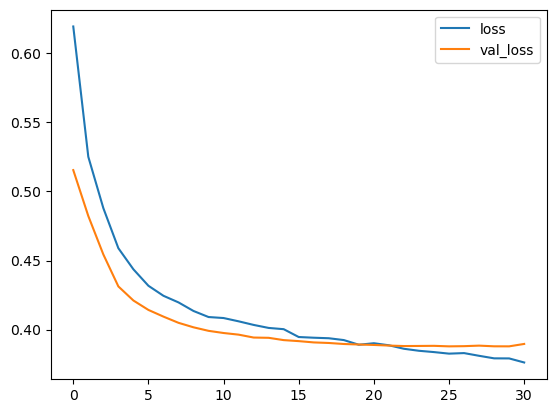

In [91]:
losses.plot()

In [92]:
pred = model.predict(X_test)
pred = [1 if x > 0.5 else 0 for x in pred]

167/167 [==============================] - 0s 1ms/step


In [93]:
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[3970  229]
 [ 648  495]]
              precision    recall  f1-score   support

           0       0.86      0.95      0.90      4199
           1       0.68      0.43      0.53      1143

    accuracy                           0.84      5342
   macro avg       0.77      0.69      0.72      5342
weighted avg       0.82      0.84      0.82      5342



In [94]:
print(roc_auc_score(y_test,pred))

0.6892670358334287


# Pembuatan model sebenarnya untuk file test features

In [1043]:
X_final = pd.read_csv('test_set_features.csv')
X_final.shape

(26708, 36)

In [1044]:
X_final.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,26707,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"> $75,000",Not Married,Rent,Employed,mlyzmhmf,"MSA, Not Principle City",1.0,0.0,atmlpfrs,hfxkjkmi
1,26708,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,Non-MSA,3.0,0.0,atmlpfrs,xqwwgdyp
2,26709,2.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,...,"> $75,000",Married,Own,Employed,lrircsnp,Non-MSA,1.0,0.0,nduyfdeo,pvmttkik
3,26710,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,lrircsnp,"MSA, Not Principle City",1.0,0.0,NaN,NaN
4,26711,3.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,lzgpxyit,Non-MSA,0.0,1.0,fcxhlnwr,mxkfnird


In [1045]:
X_final.isnull().sum()

respondent_id                      0
h1n1_concern                      85
h1n1_knowledge                   122
behavioral_antiviral_meds         79
behavioral_avoidance             213
behavioral_face_mask              19
behavioral_wash_hands             40
behavioral_large_gatherings       72
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            932
child_under_6_months             813
health_worker                    789
health_insurance               12228
opinion_h1n1_vacc_effective      398
opinion_h1n1_risk                380
opinion_h1n1_sick_from_vacc      375
opinion_seas_vacc_effective      452
opinion_seas_risk                499
opinion_seas_sick_from_vacc      521
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4497
m

In [1046]:
respondent = X_final['respondent_id']
X_final.drop(['health_insurance','employment_industry','employment_occupation','respondent_id'],axis=1,inplace=True)

In [1047]:
for x in X_final:
    X_final[x].fillna(X_final[x].mode()[0], inplace=True)

In [1048]:
X_final.isnull().sum()

h1n1_concern                   0
h1n1_knowledge                 0
behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_h1n1               0
doctor_recc_seasonal           0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
opinion_h1n1_vacc_effective    0
opinion_h1n1_risk              0
opinion_h1n1_sick_from_vacc    0
opinion_seas_vacc_effective    0
opinion_seas_risk              0
opinion_seas_sick_from_vacc    0
age_group                      0
education                      0
race                           0
sex                            0
income_poverty                 0
marital_status                 0
rent_or_own                    0
employment_status              0
hhs_geo_region                 0
census_msa                     0
household_

Preprocessing dan One hot encoding

In [1049]:
hf = X_final[['h1n1_concern', 'h1n1_knowledge','opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc']]
conc = pd.get_dummies(hf['h1n1_concern'],drop_first=True)
know = pd.get_dummies(hf['h1n1_knowledge'],drop_first=True)
opn_hfe = pd.get_dummies(hf['opinion_h1n1_vacc_effective'],drop_first=True)
opn_hr = pd.get_dummies(hf['opinion_h1n1_risk'],drop_first=True)
opn_hsfv = pd.get_dummies(hf['opinion_h1n1_sick_from_vacc'],drop_first=True)
opn_sve = pd.get_dummies(hf['opinion_seas_vacc_effective'],drop_first=True)
opn_sr = pd.get_dummies(hf['opinion_seas_risk'],drop_first=True)
opn_ssfv = pd.get_dummies(hf['opinion_seas_sick_from_vacc'],drop_first=True)
conc.rename(columns = {1.0:'h1n1_concern_1',2.0:'h1n1_concern_2',3.0:'h1n1_concern_3'},inplace=True)
know.rename(columns = {1.0:'h1n1_knowledge_1',2.0:'h1n1_knowledge_2'},inplace=True)
opn_hfe.rename(columns = {2.0:'opinion_h1n1_vacc_effective_2',3.0:'opinion_h1n1_vacc_effective_3',4.0:'opinion_h1n1_vacc_effective_4',5.0:'opinion_h1n1_vacc_effective_5'},inplace=True)
opn_hr.rename(columns = {2.0:'opinion_h1n1_risk_2',3.0:'opinion_h1n1_risk_3',4.0:'opinion_h1n1_risk_4',5.0:'opinion_h1n1_risk_5'},inplace=True)
opn_hsfv.rename(columns = {2.0:'opinion_h1n1_sick_from_vacc_2',3.0:'opinion_h1n1_sick_from_vacc_3',4.0:'opinion_h1n1_sick_from_vacc_4',5.0:'opinion_h1n1_sick_from_vacc_5'},inplace=True)
opn_sve.rename(columns = {2.0:'opinion_seas_vacc_effective_2',3.0:'opinion_seas_vacc_effective_3',4.0:'opinion_seas_vacc_effective_4',5.0:'opinion_seas_vacc_effective_5'},inplace=True)
opn_sr.rename(columns = {2.0:'opinion_seas_risk_2',3.0:'opinion_seas_risk_3',4.0:'opinion_seas_risk_4',5.0:'opinion_seas_risk_5'},inplace=True)
opn_ssfv.rename(columns = {2.0:'opinion_seas_sick_from_vacc_2',3.0:'opinion_seas_sick_from_vacc_3',4.0:'opinion_seas_sick_from_vacc_4',5.0:'opinion_seas_sick_from_vacc_5'},inplace=True)

In [1050]:
df = X_final.drop(['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc'],axis=1)
df = pd.get_dummies(df,drop_first=True)
ha = pd.get_dummies(df['household_adults'],drop_first=True)
hc = pd.get_dummies(df['household_children'],drop_first=True)
ha.rename(columns = {1.0:'household_adults_1',2.0:'household_adults_2',3.0:'household_adults_3'},inplace=True)
hc.rename(columns = {1.0:'household_children_1',2.0:'household_children_2',3.0:'household_children_3'},inplace=True)
X_final.drop(['age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa'],axis=1,inplace=True)
df.drop(['household_adults','household_children'], axis=1, inplace=True)
final_test = pd.concat([X_final,df,ha,hc],axis=1)
final_test1 = pd.concat([X_final.drop(['h1n1_concern', 'h1n1_knowledge','opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc','household_adults',
       'household_children'],axis=1),conc,know,opn_hfe,opn_hr,opn_hsfv,opn_sve,opn_sr,opn_ssfv,df,ha,hc],axis=1)

In [1051]:
final_test1.columns

Index(['behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'h1n1_concern_1', 'h1n1_concern_2', 'h1n1_concern_3',
       'h1n1_knowledge_1', 'h1n1_knowledge_2', 'opinion_h1n1_vacc_effective_2',
       'opinion_h1n1_vacc_effective_3', 'opinion_h1n1_vacc_effective_4',
       'opinion_h1n1_vacc_effective_5', 'opinion_h1n1_risk_2',
       'opinion_h1n1_risk_3', 'opinion_h1n1_risk_4', 'opinion_h1n1_risk_5',
       'opinion_h1n1_sick_from_vacc_2', 'opinion_h1n1_sick_from_vacc_3',
       'opinion_h1n1_sick_from_vacc_4', 'opinion_h1n1_sick_from_vacc_5',
       'opinion_seas_vacc_effective_2', 'opinion_seas_vacc_effective_3',
       'opinion_seas_vacc_effective_4', 'opinion_seas_vacc_effective_5',
       'opinion_seas_risk

In [1052]:
final_test1.shape

(26708, 75)

PEMBUATAN MODEL ASLI

In [1053]:
final_test1 = minmax.transform(final_test1)
final_test1.shape

(26708, 75)

In [1054]:
logf = LogisticRegression()

In [1055]:
X = minmax.transform(clean1)
y = tl['h1n1_vaccine']

In [1056]:
logf.fit(X,y)

LogisticRegression()

In [1057]:
coef = logf.coef_

In [1058]:
inter = logf.intercept_

Menghitung Probability

In [1059]:
import math

In [1060]:
h1n1_vaccine = []
for x in range(len(final_test1)):
    input = ((final_test1[:][x]*coef).sum()+inter)[0]
    h1n1_vaccine.append(round(1/(1+math.exp(-input)),1))

In [1061]:
final = pd.DataFrame({'respondent_id':respondent,'h1n1_vaccine':h1n1_vaccine})
final.head()

,respondent_id,h1n1_vaccine
0,26707,0.1
1,26708,0.0
2,26709,0.5
3,26710,0.4
4,26711,0.2


In [1062]:
final['h1n1_vaccine'].value_counts()

0.1    9981
0.0    5497
0.2    3737
0.3    2043
0.4    1466
0.5    1076
0.6     912
0.7     835
0.8     778
0.9     375
1.0       8
Name: h1n1_vaccine, dtype: int64

In [1063]:
logg = LogisticRegression()

In [1064]:
X = minmax.transform(clean1)
y = tl['seasonal_vaccine']

In [1065]:
logg.fit(X,y)

LogisticRegression()

In [1066]:
coef2 = logg.coef_

In [1067]:
inter2 = logg.intercept_

In [1068]:
seasonal_vaccine = []
for x in range(len(final_test1)):
    input = ((final_test1[:][x]*coef2).sum()+inter2)[0]
    seasonal_vaccine.append(round(1/(1+math.exp(-input)),1))

In [1069]:
final = pd.concat([final,pd.DataFrame(seasonal_vaccine,columns=['seasonal_vaccine'])],axis=1)
final.head(20)
#final data submission

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,26707,0.1,0.3
1,26708,0.0,0.0
2,26709,0.5,0.7
3,26710,0.4,0.8
4,26711,0.2,0.3
5,26712,0.4,0.9
6,26713,0.4,0.6
7,26714,0.1,0.2
8,26715,0.1,0.1
9,26716,0.2,0.9


In [1070]:
final.tail(20)

,respondent_id,h1n1_vaccine,seasonal_vaccine
26688,53395,0.1,0.5
26689,53396,0.4,0.6
26690,53397,0.3,0.8
26691,53398,0.1,0.7
26692,53399,0.1,0.0
26693,53400,0.4,0.5
26694,53401,0.1,0.8
26695,53402,0.1,0.2
26696,53403,0.2,0.3
26697,53404,0.2,0.9


In [1077]:
final.to_csv('3F.csv',sep=',',index=False)
#merubah dataframe ke csf file

TERIMA KASIH

# Percobaan dengan menggunakan model lain

In [1078]:
from sklearn.neighbors import KNeighborsClassifier

In [243]:
error_rate = []
for x in range(1,50):
    knn = KNeighborsClassifier(n_neighbors=x)
    knn.fit(X_train,y_train)
    pred = knn.predict(X_test)
    error_rate.append(np.mean(pred != y_test))

Text(0, 0.5, 'Error Rate')

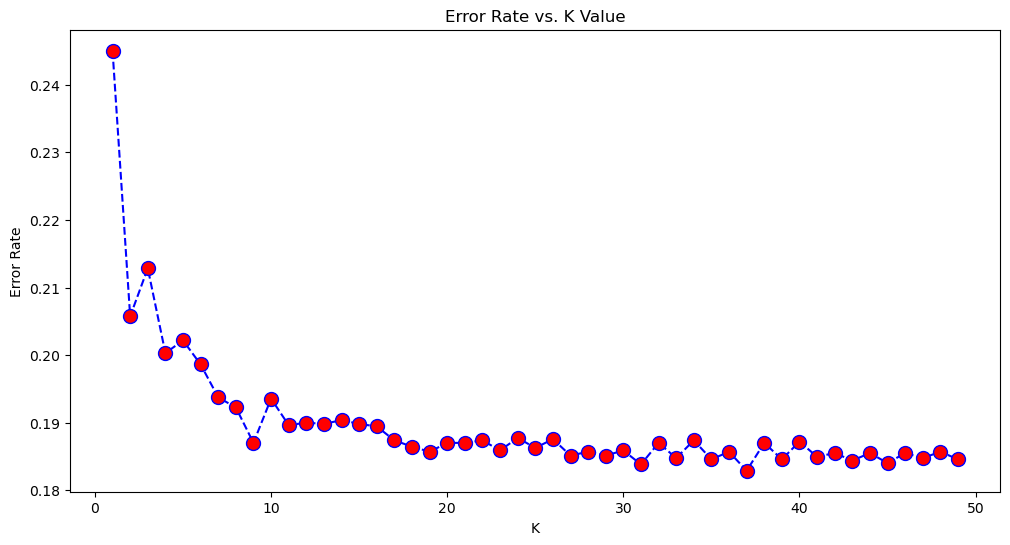

In [244]:
plt.figure(figsize=(12,6))
plt.plot(range(1,50),error_rate,color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [249]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train,y_train)
pred_knn = knn.predict(X_test)

In [250]:
print(confusion_matrix(y_test,pred_knn))
print(classification_report(y_test,pred_knn))

[[4062  137]
 [ 848  295]]
              precision    recall  f1-score   support

           0       0.83      0.97      0.89      4199
           1       0.68      0.26      0.37      1143

    accuracy                           0.82      5342
   macro avg       0.76      0.61      0.63      5342
weighted avg       0.80      0.82      0.78      5342



In [122]:
from sklearn.ensemble import RandomForestClassifier

In [127]:
rfc = RandomForestClassifier(n_estimators=1000)

In [128]:
rfc.fit(X_train,y_train)
pred_rfc = rfc.predict(X_test)

In [129]:
print(confusion_matrix(y_test,pred_rfc))
print(classification_report(y_test,pred_rfc))

[[4024  175]
 [ 698  445]]
              precision    recall  f1-score   support

           0       0.85      0.96      0.90      4199
           1       0.72      0.39      0.50      1143

    accuracy                           0.84      5342
   macro avg       0.78      0.67      0.70      5342
weighted avg       0.82      0.84      0.82      5342



In [130]:
from sklearn.svm import SVC

In [154]:
svc = SVC()
svc.fit(X_train,y_train)
pred_svc = svc.predict(X_test)

In [134]:
print(confusion_matrix(y_test,pred_svc))
print(classification_report(y_test,pred_svc))

[[4007  192]
 [ 710  433]]
              precision    recall  f1-score   support

           0       0.85      0.95      0.90      4199
           1       0.69      0.38      0.49      1143

    accuracy                           0.83      5342
   macro avg       0.77      0.67      0.69      5342
weighted avg       0.82      0.83      0.81      5342



In [149]:
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']}

In [156]:
small = X_train[:1000,:]
smalll = y_train[:1000]

In [158]:
from sklearn.model_selection import GridSearchCV

In [159]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)
grid.fit(small,smalll)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.800 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.800 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.800 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.800 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.800 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.800 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.800 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.800 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.800 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.800 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.800 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

[CV 5/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.800 total time=   0.0s
[CV 1/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.800 total time=   0.0s
[CV 2/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.810 total time=   0.0s
[CV 3/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.765 total time=   0.0s
[CV 4/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.790 total time=   0.0s
[CV 5/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.830 total time=   0.0s
[CV 1/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.750 total time=   0.0s
[CV 2/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.785 total time=   0.0s
[CV 3/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.755 total time=   0.0s
[CV 4/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.760 total time=   0.0s
[CV 5/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.790 total time=   0.0s
[CV 1/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.840 total time=   0.0s
[CV 2/5] END ...C=1000, gamm

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [162]:
gridpred = grid.predict(X_test)

In [164]:
grid.best_params_

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}

In [165]:
grid.best_estimator_

SVC(C=1, gamma=0.1)

In [161]:
print(confusion_matrix(y_test,gridpred))
print(classification_report(y_test,gridpred))

[[4025  174]
 [ 791  352]]
              precision    recall  f1-score   support

           0       0.84      0.96      0.89      4199
           1       0.67      0.31      0.42      1143

    accuracy                           0.82      5342
   macro avg       0.75      0.63      0.66      5342
weighted avg       0.80      0.82      0.79      5342



In [166]:
svc = SVC(C=1, gamma=0.1,kernel='rbf')
svc.fit(X_train,y_train)
pred_svc = svc.predict(X_test)

In [167]:
print(confusion_matrix(y_test,pred_svc))
print(classification_report(y_test,pred_svc))

[[4006  193]
 [ 710  433]]
              precision    recall  f1-score   support

           0       0.85      0.95      0.90      4199
           1       0.69      0.38      0.49      1143

    accuracy                           0.83      5342
   macro avg       0.77      0.67      0.69      5342
weighted avg       0.82      0.83      0.81      5342

